<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task2: Generate Descriptive Statistics and Visualizations

### 1. For the "Median value of owner-occupied homes" provide a boxplot

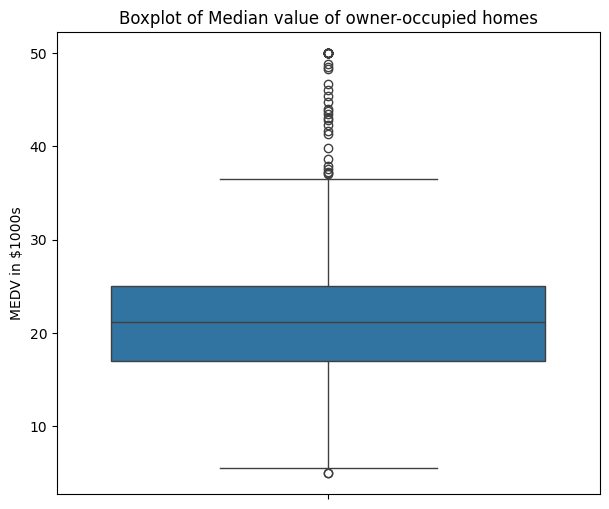

In [7]:
pyplot.figure(figsize=(7,6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Boxplot of Median value of owner-occupied homes")
pyplot.ylabel('MEDV in $1000s')
pyplot.show()

**Explanation:**
- The median home value is about $20,000
- There are outliers on the higher end, which means that there are a few homes with exceptionally high values.
- The IQR is quite small, meaning that the middle 50% of the data is tightly collected around the median.

### 2. Provide a  bar plot for the Charles river variable

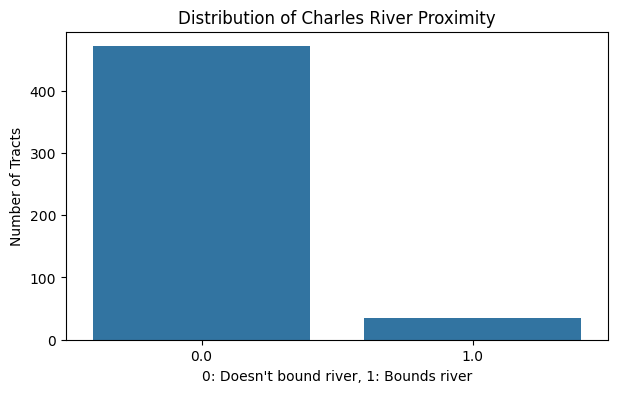

In [15]:
pyplot.figure(figsize=(7,4))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Distribution of Charles River Proximity')
pyplot.xlabel('0: Doesn\'t bound river, 1: Bounds river')
pyplot.ylabel('Number of Tracts')
pyplot.show()

**Explanation:**
- The barplot above shows that the vast majority of tracts does not border the Charles River
- This indicates a significant class imbalance in the dataset

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

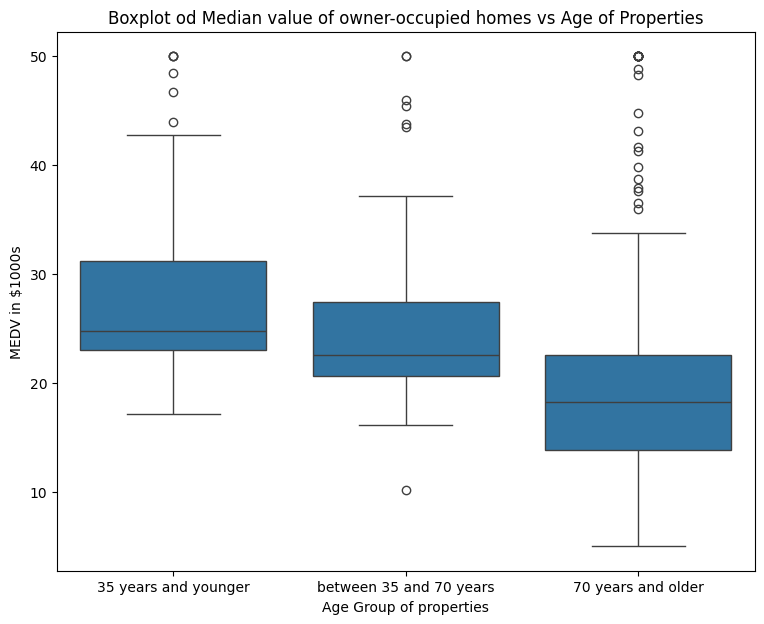

In [20]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100],
                                labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

pyplot.figure(figsize=(9, 7))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot od Median value of owner-occupied homes vs Age of Properties')
pyplot.ylabel('MEDV in $1000s')
pyplot.xlabel('Age Group of properties')
pyplot.show()

**Explanation:**
- The median home value is highest in the <= 35 group, slightly lower in the 35-70 group, and lowest in the > 70 group. This suggests that those tracts with newest homes tend to have higher median values
- An interesting observation is that the olders Age Group has a lot of outliers

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

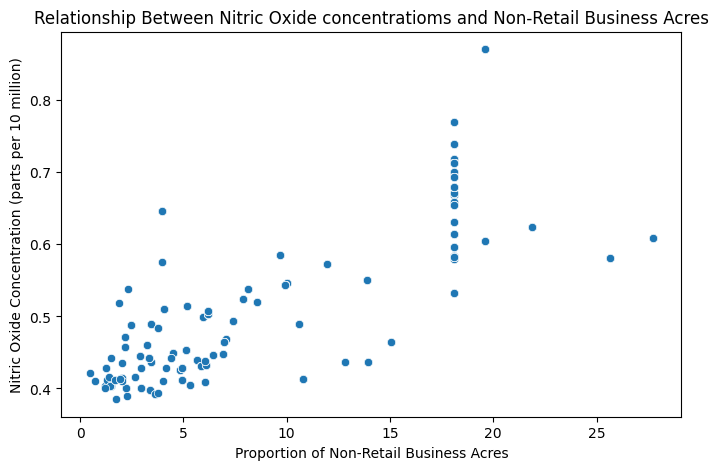

In [21]:
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship Between Nitric Oxide concentratioms and Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxide Concentration (parts per 10 million)')
pyplot.show()

**Explanation:**
- there is a likely relationship between industrial activity and air pollution
- this is a positive correlation. The trend is: as the proportion of industrial land increases, the nitric oxide concentration also tends to increase.
- The relationship is not perfectly linear, as indicated by the variability at higher INDUS values and the outliers. It can suggest that other factors may also influence nitric oxide levels


### 5. Create a histogram for the pupil to teacher ratio variable

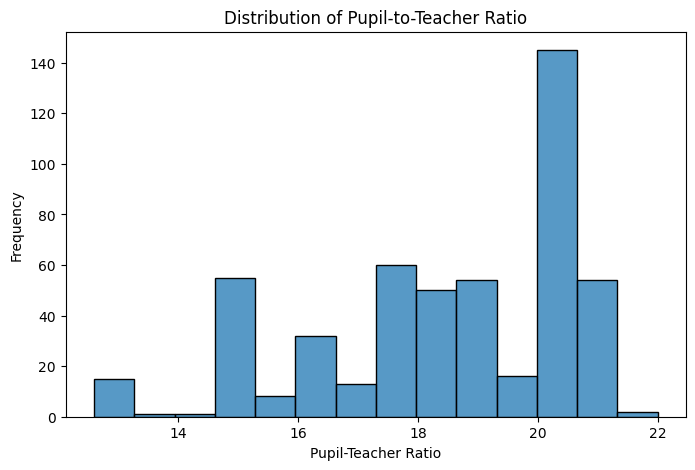

In [26]:
pyplot.figure(figsize=(8, 5))
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('Distribution of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

**Explanation:**
- The histogram above shows that the most common pupil-to-teacher ratio is slightly above 20.
- The range of pupil-teacher ratios is from approximately 12 to 22.
- There is a significant number of tracts with ratios close to 20, indicating a trend towards higher ratios
- The variability and unevenness of the distribution suggest disparities in educational resources between different tracts

## Task3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- H0: There is no significant difference in median value of houses bounded by the Charrles River
- H1: There is a significant difference in median value of houses bounded by the Charrles River
- α = 0.05

In [39]:
# checking if variances are equal

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [40]:
# since the p_value is less than 0.05 we assume the variances are not equal

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusions:**
- The variances of the median house values are significantly different between the two groups defined by CHAS
- As p-value is less than 0.05, there is a statistically significant difference in median house values between houses bounded by the Charles River and those not bounded by the river. The null hypothesis has been rejected
- The p-value is significantly smaller than 0.05, indicating that the observed difference is unlikely to have occurred by chance.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- H0: There is no difference in the median house values (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).
- H1: There is a difference in the median house values (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).
- α = 0.05

In [41]:
boston_df['AGE_GROUP'].unique()

['between 35 and 70 years', '70 years and older', '35 years and younger']
Categories (3, object): ['35 years and younger' < 'between 35 and 70 years' < '70 years and older']

In [35]:
# creating variables for each group
thirty_five_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirty_five_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusions:**
- The p-value is significantly smaller than 0.05. This indicates that there is a significant difference in the median house values (MEDV) across the three age groups.
- the ANOVA test suggests that at least one of the age groups has a significantly different median house value compared to the others.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- H0: There is no correlation between nitric oxide concentrations and the proportion of non-retail business acres per town
- H1: There is a correlation between nitric oxide concentrations and the proportion of non-retail business acres per town..
- α = 0.05

In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusions:**
- very low p-value suggests that the correlation between NOX and INDUS is statistically significant, making it unlikely to have occurred by chance.
- correlation coefficient indicates a strong positive relationship. It means that as the proportion of non-retail business acres increases, the concentration of nitric oxide tends to increase too

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- H0: There is no relationship between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes.
- H1: There is a relationship between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes.
- α = 0.05

In [38]:
X = boston_df['DIS']  # independent variable
y = boston_df['MEDV'] # dependent variable

# adding constant to model (intercept)
X = sm.add_constant(X)

# fit regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        00:51:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusions:**
- Coefficient of DIS is 1.0916. This says that for every one-unit increase in the distance to employment centers, the median house value increases by 1.0916 units.
- As R-squared is 0.062, it means that only 6.2% of the variation in MEDV can be explained by DIS. It means there are other factors that have stronger influence on house prices
- Very low p-value suggests that the relationship between distance to employment centers and median house values is statistically significant.